# Introduzione al pacchetto Pandas

Pandas è una libreria ampiamente utilizzata nell'analisi dei dati e nel machine learning.
Organizza i dati in maniera tabellare, similmente ai fogli di calcolo, ma con funzionalità molto più evolute.

Rispetto a ```numpy``` le colonne possono avere dei nomi, possono ciascuna avere tipi diversi, e sono indicizzate.

* <a href="https://pandas.pydata.org/">Riferimenti</a>.
* <a href="https://youtu.be/vmEHCJofslg">Video tutorial</a>.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wget

Legiamo i dati sulla pandemia covid 19 dal repository [GitHub](https://github.com/pcm-dpc/COVID-19) del Dipartimento di Protezione Civile. È anche possibile importare da un file in formato xlsx.

La documentazione sui vari campi si trova [sempre su Git](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md).

In [2]:
wget.download('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', out='data')

'data/dpc-covid19-ita-regioni.csv'

In [3]:
df = pd.read_csv('data/dpc-covid19-ita-regioni.csv')

In [4]:
# Load directly from URL, without intermediate local download
#
#df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

Si può visualizzare la struttura, mostrandole prime e le ultime righe della tabella.

In [5]:
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,2021-04-10T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1152,164,1316,20875,...,NaN,8.0,NaN,NaN,185367.0,0.0,2093003.0,1268393.0,ITG,ITG1
8648,2021-04-10T17:00:00,ITA,9,Toscana,43.769231,11.255889,1688,286,1974,25938,...,NaN,18.0,NaN,NaN,205645.0,2341.0,3056566.0,611757.0,ITI,ITI1
8649,2021-04-10T17:00:00,ITA,10,Umbria,43.106758,12.388247,285,43,328,3779,...,"Si fa presente che 5 dei ricoveri NON UTI, non...",3.0,NaN,NaN,52309.0,0.0,811966.0,226267.0,ITI,ITI2
8650,2021-04-10T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,65,12,77,1065,...,NaN,1.0,NaN,NaN,9678.0,335.0,84187.0,18710.0,ITC,ITC2


```df.head``` mostra le prime righe in formato testuale.

In [6]:
print(df.head(20))

                   data stato  codice_regione  denominazione_regione  \
0   2020-02-24T18:00:00   ITA              13                Abruzzo   
1   2020-02-24T18:00:00   ITA              17             Basilicata   
2   2020-02-24T18:00:00   ITA              18               Calabria   
3   2020-02-24T18:00:00   ITA              15               Campania   
4   2020-02-24T18:00:00   ITA               8         Emilia-Romagna   
5   2020-02-24T18:00:00   ITA               6  Friuli Venezia Giulia   
6   2020-02-24T18:00:00   ITA              12                  Lazio   
7   2020-02-24T18:00:00   ITA               7                Liguria   
8   2020-02-24T18:00:00   ITA               3              Lombardia   
9   2020-02-24T18:00:00   ITA              11                 Marche   
10  2020-02-24T18:00:00   ITA              14                 Molise   
11  2020-02-24T18:00:00   ITA              21           P.A. Bolzano   
12  2020-02-24T18:00:00   ITA              22            P.A. Tr

Stampiamo l'elenco delle colonne:

In [7]:
print(df.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Selezioniamo una specifica colonna:

In [8]:
df['denominazione_regione']

0              Abruzzo
1           Basilicata
2             Calabria
3             Campania
4       Emilia-Romagna
             ...      
8647           Sicilia
8648           Toscana
8649            Umbria
8650     Valle d'Aosta
8651            Veneto
Name: denominazione_regione, Length: 8652, dtype: object

Equivalentemente:

In [9]:
df.denominazione_regione

0              Abruzzo
1           Basilicata
2             Calabria
3             Campania
4       Emilia-Romagna
             ...      
8647           Sicilia
8648           Toscana
8649            Umbria
8650     Valle d'Aosta
8651            Veneto
Name: denominazione_regione, Length: 8652, dtype: object

In [10]:
df.denominazione_regione[3]

'Campania'

Selezioniamo più colonne:

In [11]:
df1 = df[['denominazione_regione', 'data', 'terapia_intensiva']]
df1

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0
3,Campania,2020-02-24T18:00:00,0
4,Emilia-Romagna,2020-02-24T18:00:00,2
...,...,...,...
8647,Sicilia,2021-04-10T17:00:00,164
8648,Toscana,2021-04-10T17:00:00,286
8649,Umbria,2021-04-10T17:00:00,43
8650,Valle d'Aosta,2021-04-10T17:00:00,12


Selezioniamo alcune righe in base all'indice. La documentazione dettagliata è [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [12]:
df1.iloc[0]

denominazione_regione                Abruzzo
data                     2020-02-24T18:00:00
terapia_intensiva                          0
Name: 0, dtype: object

In [13]:
df1.iloc[0:3]

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0


Selezioniamo una cella individualmente. Questa modalità è simile al modo di indirizzare una cella in un foglio di calcolo (excel, google spreadsheet, ...)

In [14]:
df1.iloc[0,0]

'Abruzzo'

In [15]:
df1['denominazione_regione']=="Campania"

0       False
1       False
2       False
3        True
4       False
        ...  
8647    False
8648    False
8649    False
8650    False
8651    False
Name: denominazione_regione, Length: 8652, dtype: bool

Selezioniamo le righe in base ad una condizione booleana. Ulteriore documentazione si trova [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [16]:
df_campania = df1.loc[df1['denominazione_regione']=="Campania"]
df_campania

,denominazione_regione,data,terapia_intensiva
3,Campania,2020-02-24T18:00:00,0
24,Campania,2020-02-25T18:00:00,0
45,Campania,2020-02-26T18:00:00,0
66,Campania,2020-02-27T18:00:00,0
87,Campania,2020-02-28T18:00:00,0
...,...,...,...
8550,Campania,2021-04-06T17:00:00,160
8571,Campania,2021-04-07T17:00:00,149
8592,Campania,2021-04-08T17:00:00,148
8613,Campania,2021-04-09T17:00:00,148


Iterazione su tutte le righe

In [17]:
i = 0
for index, row in df_campania.iterrows():
    print(i, index, row['data'], row['terapia_intensiva'])
    i += 1

0 3 2020-02-24T18:00:00 0
1 24 2020-02-25T18:00:00 0
2 45 2020-02-26T18:00:00 0
3 66 2020-02-27T18:00:00 0
4 87 2020-02-28T18:00:00 0
5 108 2020-02-29T17:00:00 0
6 129 2020-03-01T17:00:00 0
7 150 2020-03-02T18:00:00 0
8 171 2020-03-03T18:00:00 0
9 192 2020-03-04T17:00:00 0
10 213 2020-03-05T17:00:00 0
11 234 2020-03-06T17:00:00 0
12 255 2020-03-07T18:00:00 0
13 276 2020-03-08T18:00:00 7
14 297 2020-03-09T18:00:00 8
15 318 2020-03-10T18:00:00 8
16 339 2020-03-11T17:00:00 11
17 360 2020-03-12T17:00:00 11
18 381 2020-03-13T17:00:00 19
19 402 2020-03-14T17:00:00 17
20 423 2020-03-15T17:00:00 22
21 444 2020-03-16T17:00:00 22
22 465 2020-03-17T17:00:00 24
23 486 2020-03-18T17:00:00 24
24 507 2020-03-19T17:00:00 36
25 528 2020-03-20T17:00:00 41
26 549 2020-03-21T17:00:00 87
27 570 2020-03-22T17:00:00 99
28 591 2020-03-23T17:00:00 110
29 612 2020-03-24T17:00:00 181
30 633 2020-03-25T17:00:00 123
31 654 2020-03-26T17:00:00 114
32 675 2020-03-27T17:00:00 113
33 696 2020-03-28T17:00:00 132
34 717

372 7815 2021-03-02T17:00:00 133
373 7836 2021-03-03T17:00:00 137
374 7857 2021-03-04T17:00:00 140
375 7878 2021-03-05T17:00:00 140
376 7899 2021-03-06T17:00:00 148
377 7920 2021-03-07T17:00:00 145
378 7941 2021-03-08T17:00:00 148
379 7962 2021-03-09T17:00:00 144
380 7983 2021-03-10T17:00:00 143
381 8004 2021-03-11T17:00:00 156
382 8025 2021-03-12T17:00:00 149
383 8046 2021-03-13T17:00:00 150
384 8067 2021-03-14T17:00:00 161
385 8088 2021-03-15T17:00:00 161
386 8109 2021-03-16T17:00:00 165
387 8130 2021-03-17T17:00:00 161
388 8151 2021-03-18T17:00:00 153
389 8172 2021-03-19T17:00:00 155
390 8193 2021-03-20T17:00:00 161
391 8214 2021-03-21T17:00:00 173
392 8235 2021-03-22T17:00:00 171
393 8256 2021-03-23T17:00:00 178
394 8277 2021-03-24T17:00:00 179
395 8298 2021-03-25T17:00:00 184
396 8319 2021-03-26T17:00:00 181
397 8340 2021-03-27T17:00:00 168
398 8361 2021-03-28T17:00:00 165
399 8382 2021-03-29T17:00:00 169
400 8403 2021-03-30T17:00:00 163
401 8424 2021-03-31T17:00:00 160
402 8445 2

Un minimo di statistica...

In [18]:
df.loc[df['denominazione_regione']=='Campania'].describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,412.0,4.120000e+02,412.00000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,162.000000,162.000000,412.000000,4.120000e+02,3.570000e+02,129.000000,86.000000,86.000000,8.600000e+01,86.000000
mean,15.0,4.083957e+01,14.25085,803.631068,73.060680,876.691748,33383.949029,34260.640777,221.791262,862.000000,...,30418.993827,1237.037037,89322.750000,1.094530e+06,8.401874e+05,10.658915,265912.290698,6189.918605,2.834065e+06,111077.813953
std,0.0,7.114066e-15,0.00000,702.921142,65.590329,764.236715,39028.006143,39750.932385,1036.092543,1090.941608,...,43478.864228,1100.491939,112540.709314,1.131651e+06,7.841860e+05,7.541030,43248.364584,4467.394024,4.080666e+05,79911.192527
min,15.0,4.083957e+01,14.25085,0.000000,0.000000,0.000000,0.000000,0.000000,-9045.000000,-229.000000,...,0.000000,0.000000,0.000000,1.000000e+01,3.499400e+04,0.000000,204923.000000,73.000000,2.207249e+06,1353.000000
25%,15.0,4.083957e+01,14.25085,92.750000,6.000000,95.750000,611.500000,765.000000,-26.750000,15.750000,...,4944.500000,76.000000,4693.750000,2.146745e+05,1.546650e+05,5.000000,227362.750000,1869.750000,2.473873e+06,37527.250000
50%,15.0,4.083957e+01,14.25085,534.000000,66.500000,605.000000,3930.500000,4252.000000,20.500000,205.500000,...,7782.000000,1282.000000,9634.500000,5.157715e+05,4.760510e+05,12.000000,258306.000000,5644.500000,2.798340e+06,101374.000000
75%,15.0,4.083957e+01,14.25085,1447.250000,124.250000,1555.500000,73576.750000,75029.750000,271.750000,1539.500000,...,31464.000000,2271.000000,186720.250000,1.999239e+06,1.438729e+06,16.000000,305045.000000,11588.000000,3.193089e+06,180095.750000
max,15.0,4.083957e+01,14.25085,2331.000000,227.000000,2532.000000,102438.000000,104786.000000,4148.000000,4601.000000,...,155170.000000,3104.000000,355186.000000,3.810352e+06,2.561337e+06,29.000000,343598.000000,11588.000000,3.552440e+06,257912.000000


Ordinamento per i valori di una colonna della tabella

In [19]:
df1.loc[df1['data']=='2021-03-15T17:00:00'].sort_values('terapia_intensiva',ascending=False)

,denominazione_regione,data,terapia_intensiva
8093,Lombardia,2021-03-15T17:00:00,728
8089,Emilia-Romagna,2021-03-15T17:00:00,373
8091,Lazio,2021-03-15T17:00:00,293
8098,Piemonte,2021-03-15T17:00:00,276
8102,Toscana,2021-03-15T17:00:00,241
8099,Puglia,2021-03-15T17:00:00,189
8105,Veneto,2021-03-15T17:00:00,186
8088,Campania,2021-03-15T17:00:00,161
8094,Marche,2021-03-15T17:00:00,132
8101,Sicilia,2021-03-15T17:00:00,107


Grafici con mathplotlib

<span style="color:red">Attenzione: l'ultima versione di ```matplotlib``` genera un warning a causa di un [baco](https://github.com/pandas-dev/pandas/issues/35684).</span>

/opt/tljh/user/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 432x288 with 0 Axes>

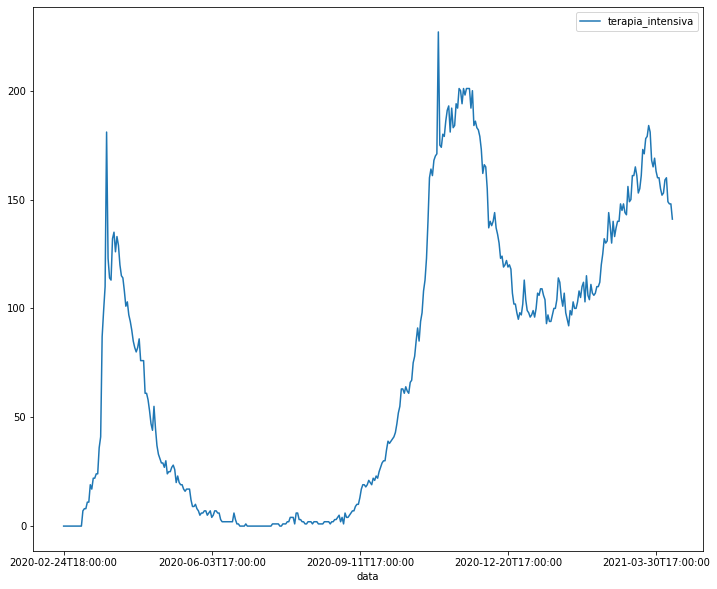

In [43]:
plt.figure()
ax = df_campania.plot(x='data',y='terapia_intensiva',figsize=(12,10))

Manipolazione delle date

In [21]:
df['data']

0       2020-02-24T18:00:00
1       2020-02-24T18:00:00
2       2020-02-24T18:00:00
3       2020-02-24T18:00:00
4       2020-02-24T18:00:00
               ...         
8647    2021-04-10T17:00:00
8648    2021-04-10T17:00:00
8649    2021-04-10T17:00:00
8650    2021-04-10T17:00:00
8651    2021-04-10T17:00:00
Name: data, Length: 8652, dtype: object

In [22]:
df['data_dt'] = pd.to_datetime(df['data'])

In [23]:
df[['data', 'data_dt']]

,data,data_dt
0,2020-02-24T18:00:00,2020-02-24 18:00:00
1,2020-02-24T18:00:00,2020-02-24 18:00:00
2,2020-02-24T18:00:00,2020-02-24 18:00:00
3,2020-02-24T18:00:00,2020-02-24 18:00:00
4,2020-02-24T18:00:00,2020-02-24 18:00:00
...,...,...
8647,2021-04-10T17:00:00,2021-04-10 17:00:00
8648,2021-04-10T17:00:00,2021-04-10 17:00:00
8649,2021-04-10T17:00:00,2021-04-10 17:00:00
8650,2021-04-10T17:00:00,2021-04-10 17:00:00


In [24]:
day_1 = df['data_dt'].min()

In [25]:
day_1

Timestamp('2020-02-24 18:00:00')

In [26]:
df['giorni'] = (df['data_dt'] - day_1).dt.days

In [27]:
df[['giorni', 'data_dt']]

,giorni,data_dt
0,0,2020-02-24 18:00:00
1,0,2020-02-24 18:00:00
2,0,2020-02-24 18:00:00
3,0,2020-02-24 18:00:00
4,0,2020-02-24 18:00:00
...,...,...
8647,410,2021-04-10 17:00:00
8648,410,2021-04-10 17:00:00
8649,410,2021-04-10 17:00:00
8650,410,2021-04-10 17:00:00


In [28]:
df_campania = df.loc[df1['denominazione_regione']=="Campania"]

In [29]:
df_campania[['giorni', 'data_dt']]

,giorni,data_dt
3,0,2020-02-24 18:00:00
24,1,2020-02-25 18:00:00
45,2,2020-02-26 18:00:00
66,3,2020-02-27 18:00:00
87,4,2020-02-28 18:00:00
...,...,...
8550,406,2021-04-06 17:00:00
8571,407,2021-04-07 17:00:00
8592,408,2021-04-08 17:00:00
8613,409,2021-04-09 17:00:00


In [30]:
df_regione = df.loc[(df['denominazione_regione']=='Piemonte') & (df['giorni']>204)].copy().reset_index(drop=True)

<AxesSubplot:xlabel='giorni'>

<Figure size 864x720 with 0 Axes>

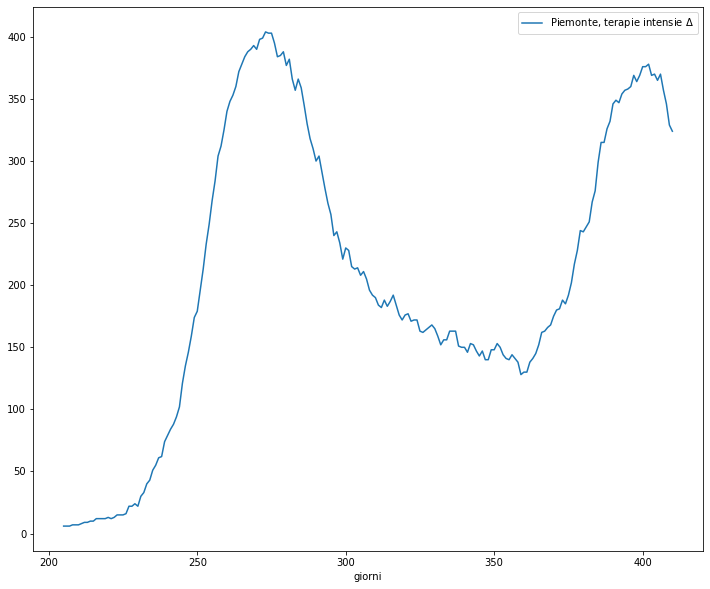

In [31]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
df_regione.plot(x='giorni', y='terapia_intensiva', ax=ax, figsize=(12,10), label='Piemonte, terapie intensie $\Delta$')
# In alternativa, è possibile passare direttamente le colonne del DataFramce a matplotlib:
#plt.plot(df_regione['giorni'],df_regione['terapia_intensiva'])

Per calcolare la differenza con ciascun giorn precedente basta fare lo *shift* della colonna e sottrarla alla colonna stessa:

In [32]:
df_regione['terapia_intensiva_gg']=df_regione['terapia_intensiva']-df_regione['terapia_intensiva'].shift(-1)

Per fare lo stesso calcolo con un codice tradizionale che usa un loop, il codice diventa decisamente più involuto. <span style="color:blue;">Ogni volta che è possibile, conviene usare le funzioni di pandas perché sono più efficienti e richiedono meno linee di codice.</span>

In [33]:
import numpy as np
df_regione['terapia_intensiva_gg_loop'] = np.nan
prev = 0
i = 0 
for ti in df_regione['terapia_intensiva']:
    if i >0: df_regione['terapia_intensiva_gg_loop'].at[i-1]=ti - prev
    prev = ti
    i += 1

In [34]:
df_regione[['terapia_intensiva_gg', 'terapia_intensiva_gg_loop']]

,terapia_intensiva_gg,terapia_intensiva_gg_loop
0,0.0,0.0
1,0.0,0.0
2,-1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
201,13.0,-13.0
202,11.0,-11.0
203,17.0,-17.0
204,5.0,-5.0


Per il calcolo della **media mobile**, è possibile usare la funzione [```rolling```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) che raggruppa gli ultimi valori per poter calcolare semplici indicatori statistici (somma, media, ecc.). Esistono opzioni per dare un peso ai diversi valori per usi molto particolari.

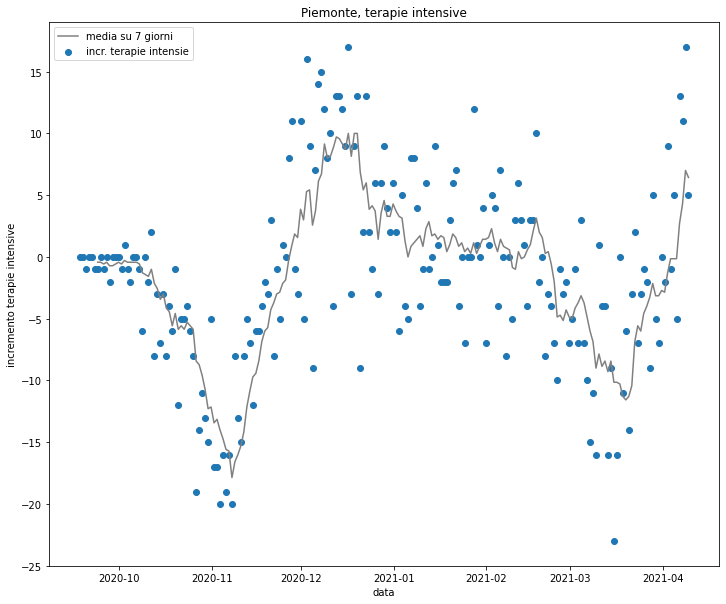

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x=df_regione.data_dt, y=df_regione.terapia_intensiva_gg, label='incr. terapie intensie')
ax.plot(df_regione.data_dt, df_regione.terapia_intensiva_gg.rolling(window=7).mean(), color='gray', label='media su 7 giorni')
ax.set_title('Piemonte, terapie intensive')
ax.set_xlabel('data')
ax.set_ylabel('incremento terapie intensive')
ax.legend()

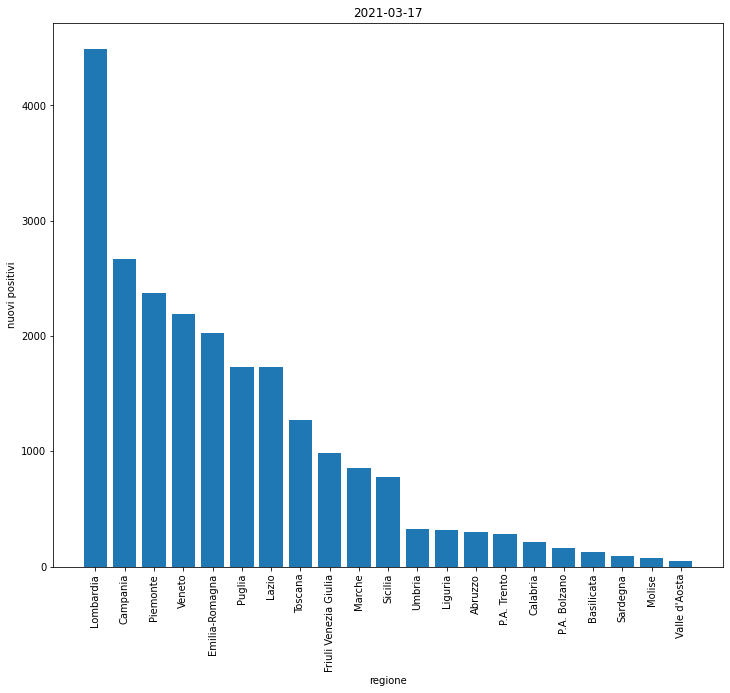

In [36]:
df_today=df[df['data']=='2021-03-17T17:00:00'].copy().reset_index(drop=True)
df_today=df_today.sort_values(by=['nuovi_positivi'], ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(df_today['denominazione_regione'], df_today['nuovi_positivi'])
ax.set_xlabel('regione')
ax.set_ylabel('nuovi positivi')
plt.title('2021-03-17')
plt.xticks(rotation='vertical')
plt.show()

# Spunti per esercizi

* usando lo stesso dataframe del Dipartimento della Protezione Civile, fare grafici delle seguenti quantità:
    * totale positivi in Campania (o una regione che preferite) in funzione della data
    * positivi giornalieri in Campania in funzione della data
    * media mobile a 7 giorni dei positivi giornalieri in Campania in funzione della data
    * distribuzione del numero di decessi totale per regione ad oggi
    * distribuzione del numero di positivi giornalieri rispetto al numero di tamponi fatti in funzione della data
    * ...

* creare un data frame con la propria agenda telefonica.

*Hint* usare tutorial e guide in rete su come creare un DataFrame da zero. Ad esempio [questo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

* creare un data frame con i risultati del calendario di serie A e da questo determinare la classifica.

*Hint*: alcuni dati si possono trovare [qui](https://www.kaggle.com/massibelloni/serie-a-19932017) oppure [qui](https://www.football-data.co.uk/italym.php) in formato CSV. Il significato degli acronimi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html).

* Variazione sul tema: creare un data frame con il numero di rigori per stagione di ciascuna squadra e graficare l'andamento negli anni

*Hint*: le statistiche sui rigori ricevuti si trovano su <a href="https://www.transfermarkt.it/serie-a/topErhalteneElfmeter/wettbewerb/IT1/plus/?saison_id=2018">transfermarkt</a>. Ma non sono scaricabili in CSV. <a href="https://www.kaggle.com/emilerichard/penalty-statistics-20192020">qui</a> c'è il file per il 2019-2020.

Altri esempi di dataset si possono trovare nei seguenti repositories:
* <a href="https://datasetsearch.research.google.com/">Google dataset search</a>
* <a href="https://www.kaggle.com/">Kaggle</a>
* <a href="https://archive.ics.uci.edu/ml/index.php">Machine learning repository</a>
* <a href="https://datahub.io/">DataHub</a>
* <a href="https://data.humdata.org/dataset">HDX</a>

<span style="color: gray">Si ringrazia G. Bonifazi per le fonti citate sopra.</span>